<a href="https://colab.research.google.com/github/ashishsaranshakya/learning_data_analytics/blob/main/Environment_Social_And_Governance_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment, Social And Governance Data Analysis



In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Importing data from https://www.kaggle.com/datasets/tunguz/environment-social-and-governance-data/ related to the information on 17 key sustainability themes spanning environmental, social, and governance categories.

Dataset has been compiled from World Bank's ESG Data Draft

In [ ]:
esg_data_df = pd.read_csv('ESGData.csv')
esg_data_df['Country Name'].unique()

In [ ]:
esg_country_series_df = pd.read_csv('ESGCountry-Series.csv')
esg_country_series_df.columns

In [ ]:
esg_country_df = pd.read_csv('ESGCountry.csv')
esg_country_df.head()

In [ ]:
esg_series_time_df = pd.read_csv('ESGSeries-Time.csv')
esg_series_time_df.head()

In [ ]:
esg_series_df = pd.read_csv('ESGSeries.csv')
esg_series_df.head()
esg_series_df[esg_series_df['Series Code']=='EG.CFT.ACCS.ZS']

Extracting data on India, South Asia and the World for comparison

In [ ]:
india_esg_df = esg_data_df[esg_data_df['Country Name']=='India']
india_esg_df.head(1)

In [ ]:
south_asia_esg_df = esg_data_df[esg_data_df['Country Name']=='South Asia']
south_asia_esg_df

In [ ]:
world_esg_df = esg_data_df[esg_data_df['Country Name']=='World']
world_esg_df

In [27]:
def format_data(df):
  df_years = df.index[4:-1]
  df_values = df[4:-1]
  df_cleaned_years = [int(year) for year in df_years if str(year).isdigit()]
  df_cleaned_values = pd.to_numeric(df_values, errors='coerce')
  return (df_cleaned_years,df_cleaned_values)

In [28]:
def plot_country(series,ax):
  series_cleaned_years, series_cleaned_values = format_data(series)
  ax.plot(series_cleaned_years, series_cleaned_values)

In [41]:
def plot_indicator(data,indicator_name,ax):
  legend=[]
  indicator_label=''

  for df in data:
    series=df[df['Indicator Code']==indicator_name].squeeze(axis=0)
    indicator_label=series['Indicator Name']
    legend.append(series['Country Name'])
    plot_country(series,ax)

  ax.set_xlabel('Year')
  ax.set_ylabel(indicator_name)
  ax.set_title(f'{indicator_label} over time')

  ax.legend(legend)

In [61]:
def plot_all_indicator(df, countries_list,start=0,limit=-1):
  indicator_list=df['Indicator Code'].unique()[start:limit]
  #plt.figure(figsize=(8, 30))
  fig, axes = plt.subplots(len(indicator_list), 1, figsize=(10, 20))
  countries_df_list=[]
  for name in countries_list:
    countries_df_list.append(esg_data_df[esg_data_df['Country Name']==name])
  plt.tight_layout(pad=5);
  i=0
  for indicator in indicator_list:
    plot_indicator(countries_df_list,indicator,axes[i])
    i+=1

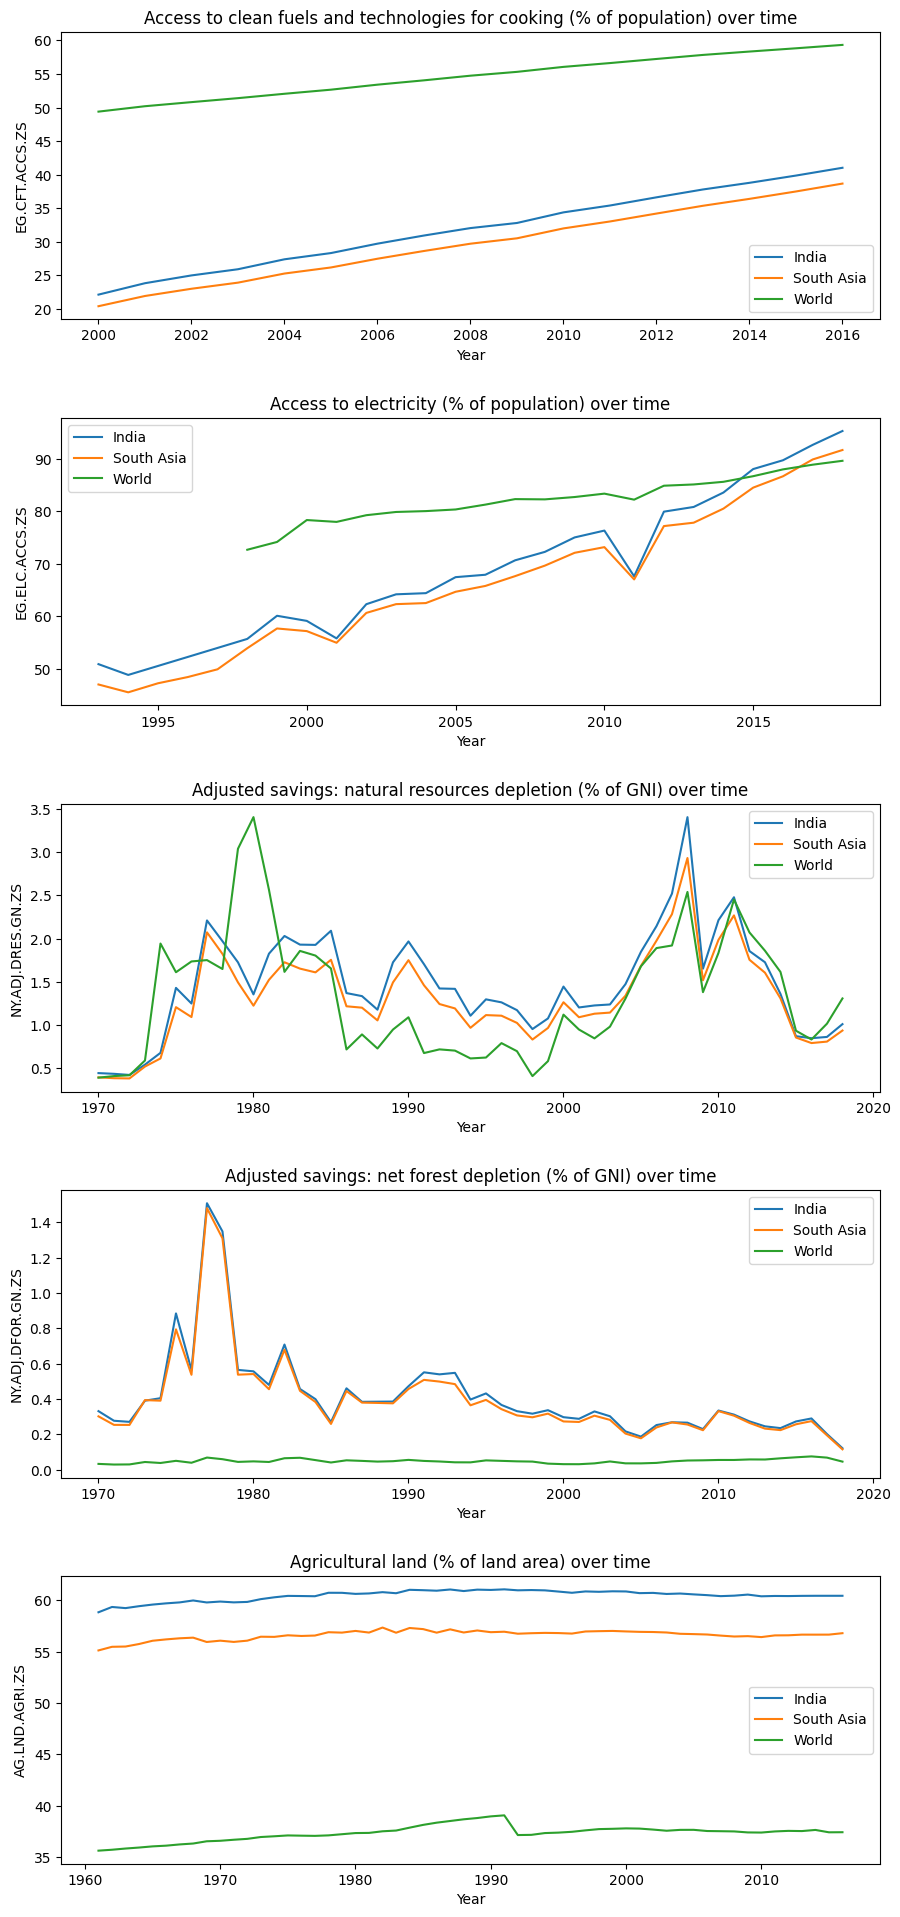

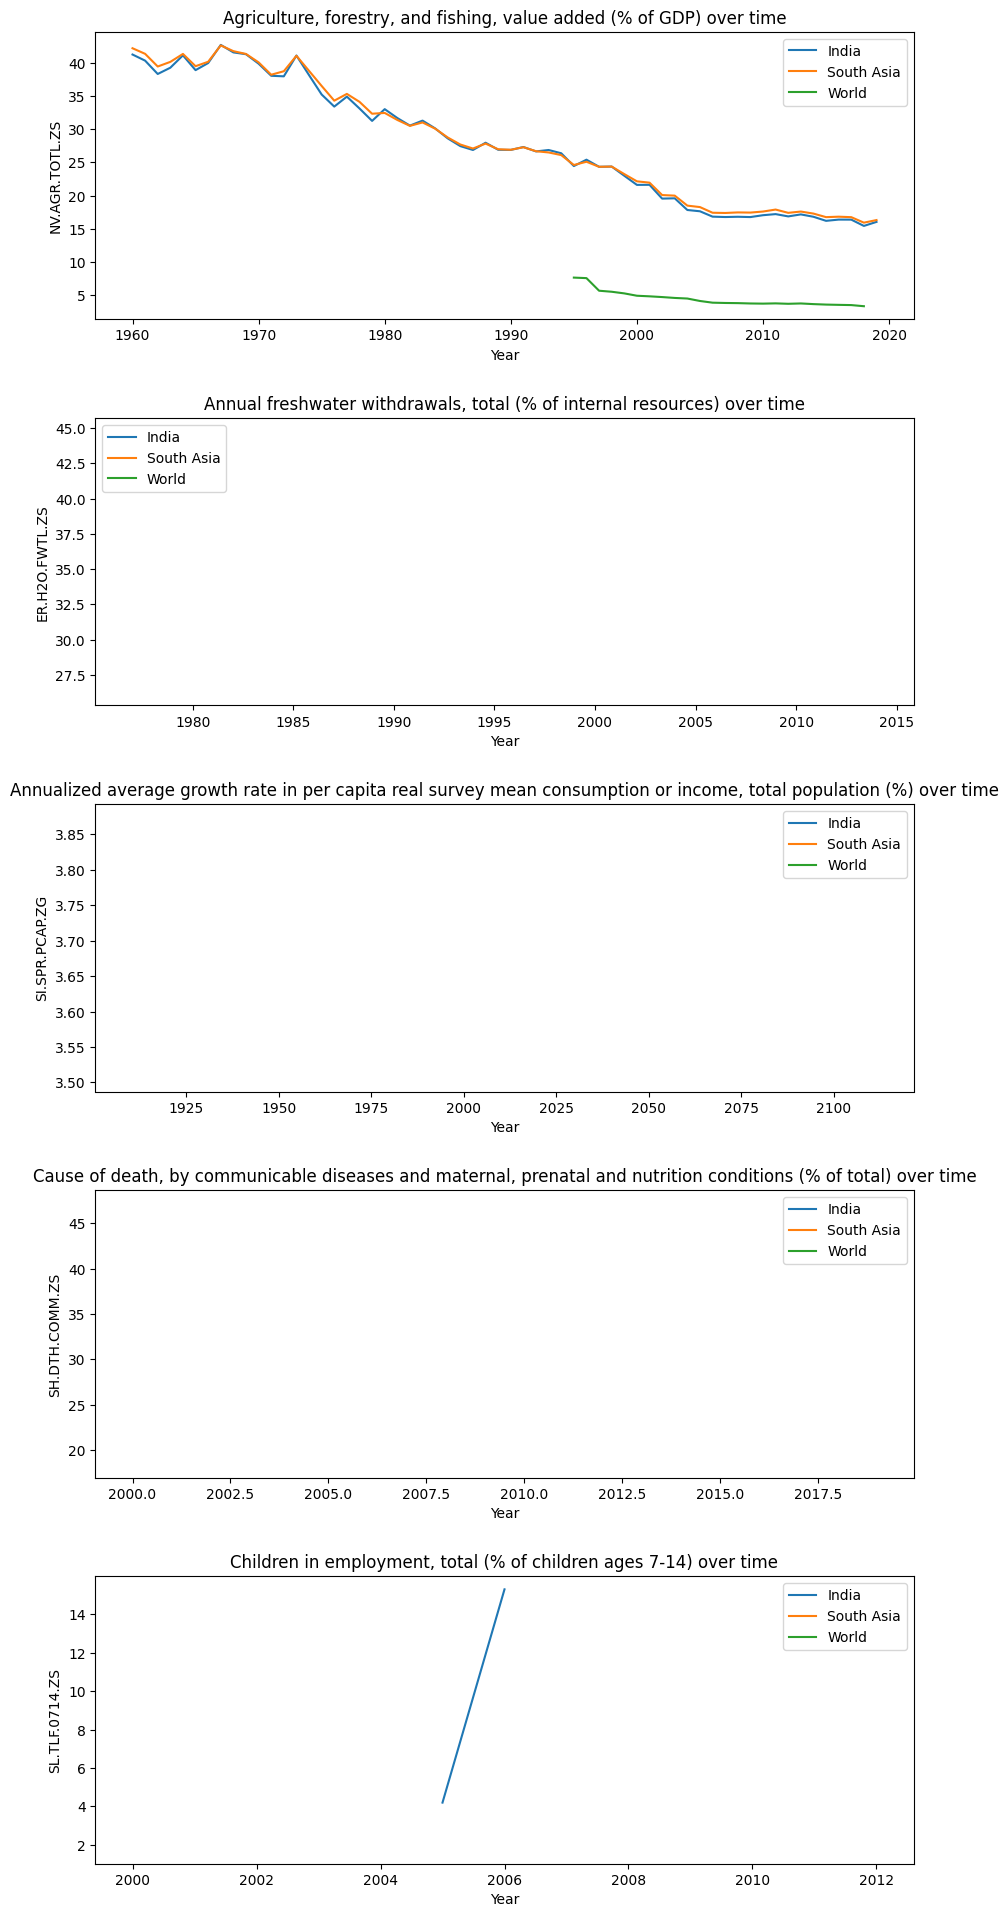

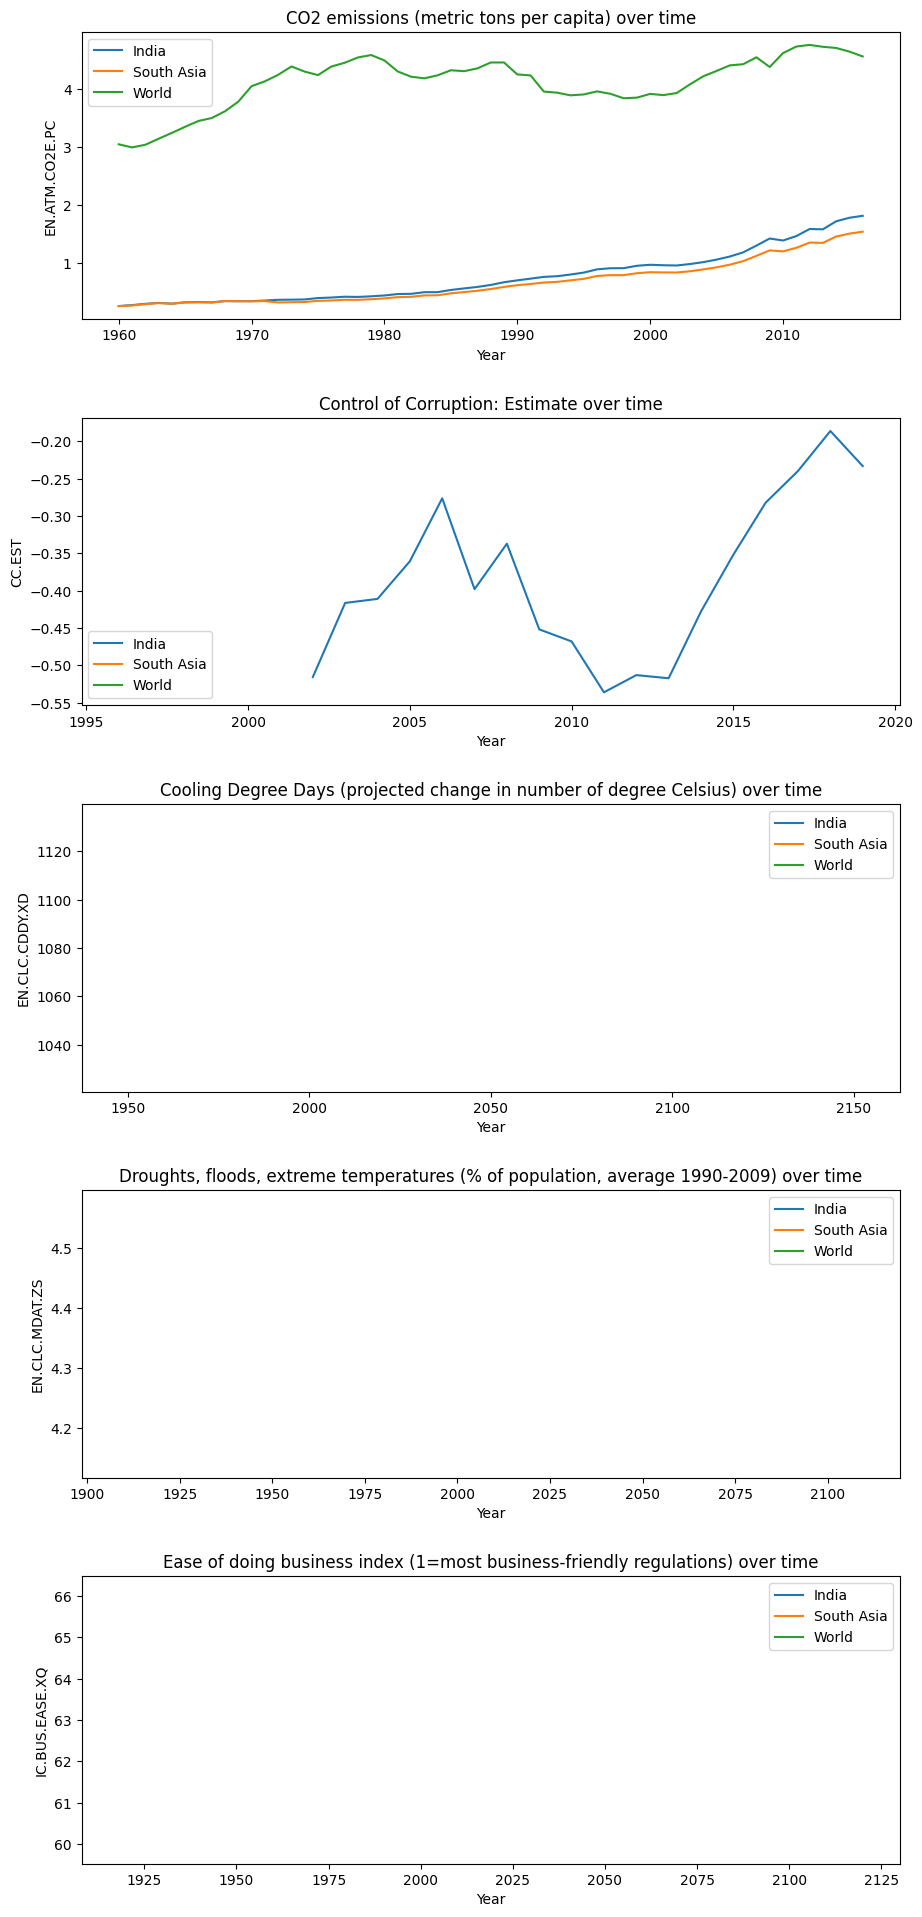

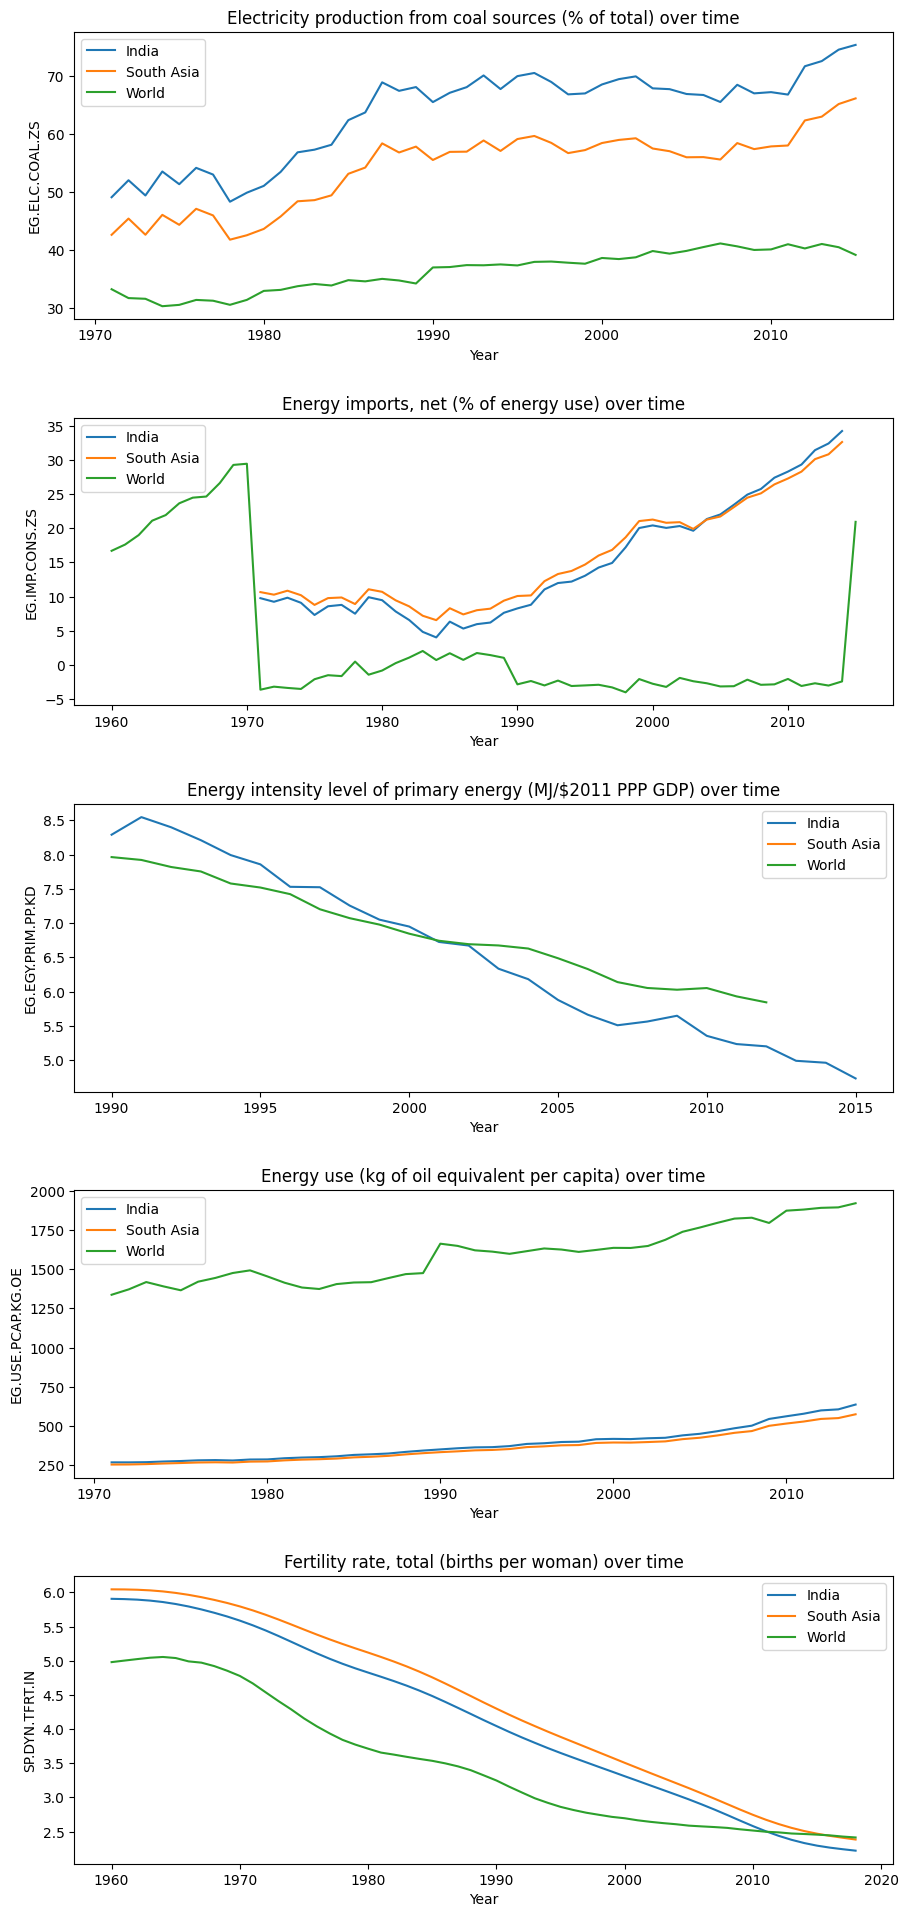

In [63]:
plot_all_indicator(esg_data_df,['India','South Asia','World'],0,5)
plot_all_indicator(esg_data_df,['India','South Asia','World'],5,10)
plot_all_indicator(esg_data_df,['India','South Asia','World'],10,15)
plot_all_indicator(esg_data_df,['India','South Asia','World'],15,20)